<a href="https://colab.research.google.com/github/AlenZhang-Dev/Learning-Records/blob/master/Machine%20Learning/Deep%20Learning%20with%20Python/3.4%20%E7%94%B5%E5%BD%B1%E8%AF%84%E8%AE%BA%E5%88%86%E7%B1%BB%E3%80%90%E4%BA%8C%E5%88%86%E7%B1%BB%E3%80%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 电影评论分类：二分类问题
二分类是应用最广泛的机器学习问题。本例将根据电影评论的文字内容将其划分为正面或负面。

## IMDB数据集
使用IMDB数据集，包含来自互联网电影数据库的50000条严重两集分化的评论。数据集被分为用于训练的25000条评论与用于测试的25000条评论。训练集和测试集都包含50%的正面评论和50%的负面评论。

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data[0]
train_labels[0]

17465344/17464789 [==============================] - 0s 0us/step


1

## 数据准备
你不能将整数序列直接输入神经网络。你需要将列表转换为张量。转换方法有以下两种

1.   填充列表，使其具有相同长度。再将列表转换成形状为(samples, word_indices)的整数张量，然后网络的第一层使用能处理这种张量整数张量的层。
2.   对列表进行one-hot编码，将其转换为0和1组成的向量。序列[3,5]将会被转换为10000维的向量，只有索引为3和5的元素是1，其余都是0。然后网络的第一层可以用Dense，他可以处理浮点向量数据。

以下使用方法2准备数据



In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

x_train[0]

# 将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 构建网络
输入数据是向量，而标签是标量（0和1），这是遇到的最好情况。在该模型中我们使用以下架构
1.  两个中间层，每层有16个隐藏变量
2.  第三层输出一个标量，预测当前评论的情感
中间层使用relu作为激活函数，最后一层使Sigmoid函数激活输出一个0-1范围内的概率。

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

以下选择损失函数和优化器。二分类问题的网络输出是一个概率值，最好使用binary_crossentropy(二元交叉熵)损失，这并不是唯一可行的选择，还可以使用mean_squared_error（均方误差）。对于输出概率的值，交叉熵往往是最好的选择。

## 编译模型
因为rmsprop、binary_crossentropy和accuracy都是Keras内置的一部分。可以通过optimzer参数传入一个优化器累实现。

In [4]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 配置优化器


In [5]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

使用自定义的损失和指标。

In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## 验证
留出验证集并进行训练

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 45ms/step - loss: 0.5489 - accuracy: 0.7835 - val_loss: 0.4291 - val_accuracy: 0.8607
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3484 - accuracy: 0.8935 - val_loss: 0.3376 - val_accuracy: 0.8725
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2526 - accuracy: 0.9190 - val_loss: 0.2866 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1971 - accuracy: 0.9354 - val_loss: 0.2775 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1620 - accuracy: 0.9466 - val_loss: 0.2781 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1330 - accuracy: 0.9574 - val_loss: 0.3067 - val_accuracy: 0.8801
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1096 - accuracy: 0.9672 - val_loss: 0.3130 - val_accuracy: 0.8801
Epoch 8/20
30

以下字典中的四个指标对应训练过程中的验证过程和监控指标。以下为对数据进行可视化

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

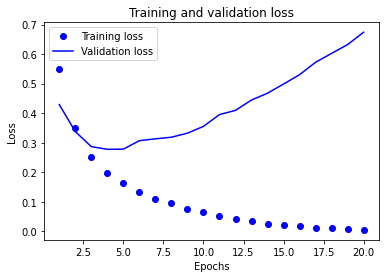

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

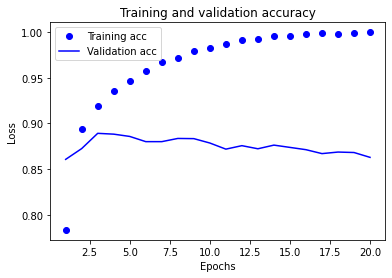

In [12]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

然后从头开始训练一个网络


In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 26ms/step - loss: 0.4638 - accuracy: 0.8117
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2673 - accuracy: 0.9078
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2039 - accuracy: 0.9299
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2922 - accuracy: 0.8834


In [14]:
results

[0.2922472059726715, 0.883400022983551]

使用训练好的网路在新数据上生成预测结果

In [15]:
model.predict(x_test)

array([[0.22443414],
       [0.9977936 ],
       [0.9192313 ],
       ...,
       [0.14909774],
       [0.09306887],
       [0.6657225 ]], dtype=float32)

## 进一步实验
通过以下实现，你可以确信前面选择的网络架构挺合理，但还有改进空间。
* 尝试使用一个或3个以上的隐藏层，观察对验证精度和测试精度的影响。
* 尝试使用更少的隐藏单元。
* 尝试使用mse损失函数代替binary_crosseentropy。
* 尝试使用tanh激活（该激活函数在神经网络早期流行）代替relu。

## 总结
1. 需要对原始数据进行大量的预处理，方便将其转换为张量输入到神经网络中。单词序列使用二进制向量编码，但也有别的编码方式。

2. 带有relu激活的Dense层堆叠，可以解决很多种问题。

3. 对于二分类问题，网络最后一层应该是只有一个单元并使用sigmoid激活的Dense层，网络输出应该是0～1范围内的标量，表示概率值。

4. 对于二分类问题的sigmoid标量输出，应该使用binary_crossentropy损失函数。

5. 无论问题是什么，rmsprop优化器通常都是足够好的选择。

6. 随着神经网络在训练数据上的表现越来越好，模型最终会过拟合，所以需要监控模型在训练集之外的性能。